In [25]:
import boto3
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv()

s3 = boto3.client('s3')
bucket_name = os.getenv('bucket')

In [8]:
response = s3.get_object(Bucket=bucket_name, Key='raw/Training/VID04/Frames/006251.png')
data = response['Body'].read()

In [9]:
image = Image.open(BytesIO(data))
image.show()

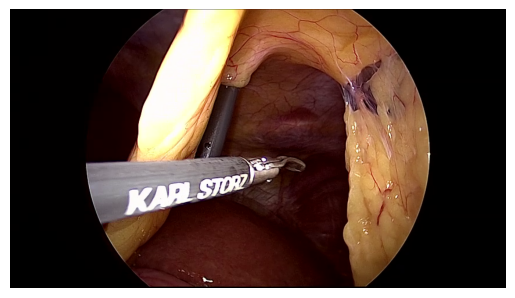

In [10]:
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [24]:
from io import StringIO
response = s3.get_object(Bucket=bucket_name, Key='raw/Training/VID04/vid04.json')
json_data = response['Body'].read().decode('utf-8')
df = pd.read_json(StringIO(json_data))
df

,info,annotations,categories,video
dataset,CholecTrack20,NaN,NaN,NaN
description,Laparoscopic cholecystectomy video dataset for...,NaN,NaN,NaN
year,2022,NaN,NaN,NaN
version,1.0,NaN,NaN,NaN
author,Chinedu I. Nwoye,NaN,NaN,NaN
...,...,...,...,...
name,NaN,NaN,NaN,VID04
num_frames,NaN,NaN,NaN,1189
split,NaN,NaN,NaN,training
height,NaN,NaN,NaN,480


In [21]:
df['annotations'].dropna().head(3).to_list()

[[{'instrument': 3,
   'verb': -1,
   'target': -1,
   'phase': 0,
   'triplet': -1,
   'tool_bbox': [0.459016393442622,
    0.5145833333333331,
    0.139344262295081,
    0.125],
   'operator': 1,
   'iscrowd': 0,
   'area': 96823.99999999999,
   'score': 1.0,
   'intraoperative_track': 1,
   'intracorporeal_track': 1,
   'visibility_track': 1,
   'visibility': 1,
   'crowded': 0,
   'visible': 1,
   'occluded': 0,
   'bleeding': 0,
   'smoke': 0,
   'blurred': 0,
   'undercoverage': 0,
   'reflection': 0,
   'stainedlens': 0}],
 [{'instrument': 3,
   'verb': -1,
   'target': -1,
   'phase': 0,
   'triplet': -1,
   'tool_bbox': [0.620608899297423,
    0.48541666666666605,
    0.153395784543325,
    0.17500000000000002],
   'operator': 1,
   'iscrowd': 0,
   'area': 123489.99999999999,
   'score': 1.0,
   'intraoperative_track': 1,
   'intracorporeal_track': 1,
   'visibility_track': 1,
   'visibility': 1,
   'crowded': 0,
   'visible': 1,
   'occluded': 0,
   'bleeding': 0,
   'smoke'

In [20]:
df[df['info'].notna()]
df[df['categories'].notna()]


,info,annotations,categories,video
tools,NaN,NaN,"[{'id': 0, 'name': 'grasper', 'supercategory':...",NaN
operators,NaN,NaN,"[{'id': 0, 'name': 'null'}, {'id': 1, 'name': ...",NaN
